In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

In [2]:
df=pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.shape

(4600, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Lets make an age feature as this will make more sense for the model than the year built

In [7]:
df['Age'] = 2023 - df['yr_built']
df.drop('yr_built', axis=1, inplace=True)

Lets also make a feature years since renovation. If the house has never been renovatted the value of this will be the age of teh house

In [8]:
df['Yr_since_rennovation'] = np.nan
i=0
while i < len(df['yr_renovated']):
    if df['yr_renovated'][i] ==0:
        df['Yr_since_rennovation'][i] = df['Age'][i]
    else:
        df['Yr_since_rennovation'][i]=2023 - df['yr_renovated'][i]
    i=i+1

df.drop('yr_renovated', axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10204\410564272.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yr_since_rennovation'][i]=2023 - df['yr_renovated'][i]
C:\Users\USER\AppData\Local\Temp\ipykernel_10204\410564272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yr_since_rennovation'][i] = df['Age'][i]


In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,street,city,statezip,country,Age,Yr_since_rennovation
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,18810 Densmore Ave N,Shoreline,WA 98133,USA,68,18.0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,709 W Blaine St,Seattle,WA 98119,USA,102,102.0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,57,57.0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,857 170th Pl NE,Bellevue,WA 98008,USA,60,60.0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,9105 170th Ave NE,Redmond,WA 98052,USA,47,31.0


Next we need to deal with the non numeric features

In [10]:
df['country'].unique()

array(['USA'], dtype=object)

From the above we can see that the counrty column only has 1 value(USA). because all teh features have teh same value, this column doesnot add any value to our data so we drop it

In [11]:
df.drop('country', axis =1, inplace=True)

In [12]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,street,city,statezip,Age,Yr_since_rennovation
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,18810 Densmore Ave N,Shoreline,WA 98133,68,18.0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,709 W Blaine St,Seattle,WA 98119,102,102.0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,26206-26214 143rd Ave SE,Kent,WA 98042,57,57.0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,857 170th Pl NE,Bellevue,WA 98008,60,60.0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,9105 170th Ave NE,Redmond,WA 98052,47,31.0
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,522 NE 88th St,Seattle,WA 98115,85,29.0
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,2616 174th Ave NE,Redmond,WA 98052,47,47.0
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,23762 SE 253rd Pl,Maple Valley,WA 98038,34,34.0
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,46611-46625 SE 129th St,North Bend,WA 98045,38,38.0
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,6811 55th Ave NE,Seattle,WA 98115,78,13.0


Next we find outliers that will affect our model

to see if teh city has an effect on the price:

<AxesSubplot:xlabel='price'>

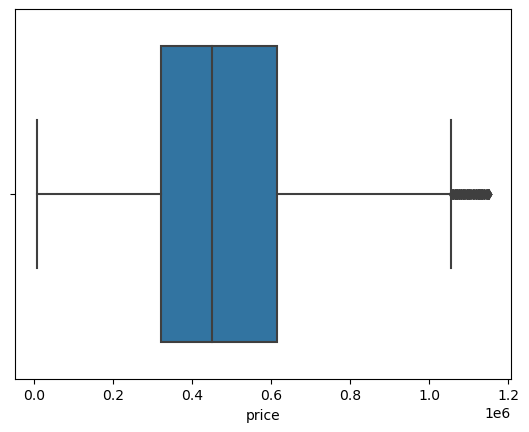

In [34]:
sb.boxplot(x=df['price'])

In [14]:
## the positions where the price is greater than the upper fence
out = np.where(df['price']>1150000)


## the above code returns an array in a tuple within a tuple. Very confusing for me. So i had to convert it to a list
out = list(out)
out= list(out[0])

i=0
while i<len(out):
    df.drop(out[i],axis = 0, inplace=True)
    i=i+1

df.reset_index(drop=True, inplace=True)

In [15]:
## the positions where the price is 0
price_zero = np.where(df['price']==0)

price_zero = list(price_zero)
price_zero= list(price_zero[0])

i=0
while i<len(price_zero):
    df.drop(price_zero[i],axis = 0, inplace=True)
    i=i+1

df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(4311, 17)

I will drop the date, statezip ,city and street because i am new to ML and this only confuses me. Once i get better I will come an implement them

In [17]:
df.drop(['date', 'city', 'street', 'statezip'], axis=1, inplace=True)

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,Age,Yr_since_rennovation
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,68,18.0
1,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,57,57.0
2,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,60,60.0
3,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,47,31.0
4,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,85,29.0


## Visualization

<AxesSubplot:>

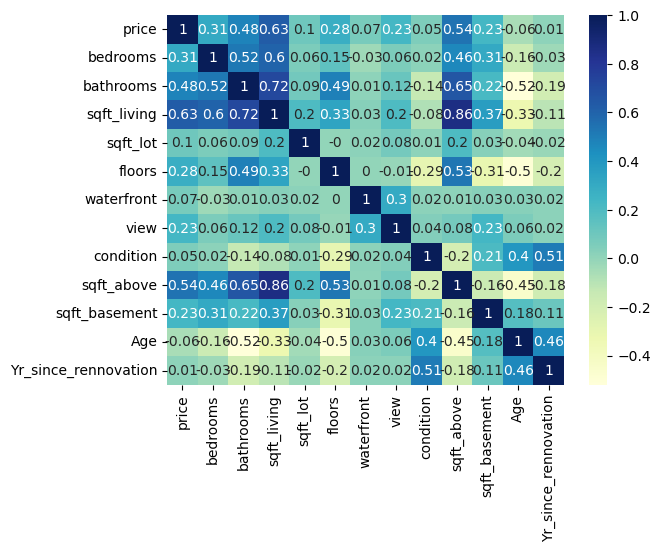

In [19]:
sb.heatmap(df.corr().round(2), cmap='YlGnBu', annot=True)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

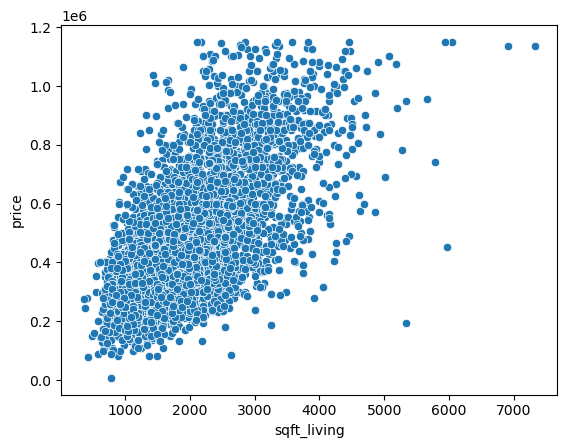

In [33]:
sb.scatterplot( x=df['sqft_living'], y=df['price'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

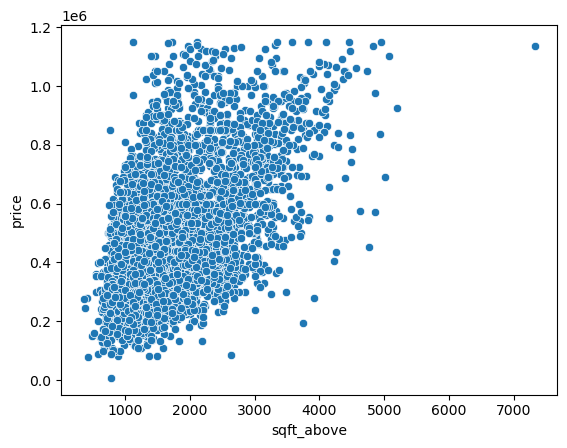

In [32]:
sb.scatterplot( x=df['sqft_above'], y=df['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

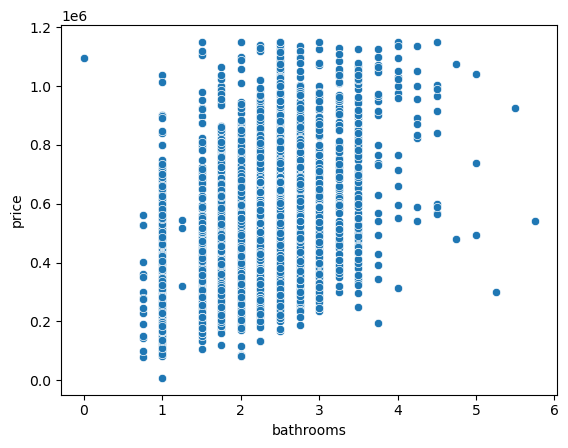

In [31]:
sb.scatterplot( x=df['bathrooms'], y=df['price'])

## The model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

What i will use for the model is sqft_living, sqft_above, bathrooms, bedrooms, floors

In [24]:
X=df[['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'floors']]
y=df['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)

In [26]:
model = LinearRegression().fit(X_train, y_train)

In [27]:
y_pred = model.predict(X_test)

##### The performance of the model

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
r2=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('RMSE =', rmse)
print('R Squared =', (r2*100).round(2),'%')
print('MAE =',mae)
print('MSE =',mse)

RMSE = 167866.6569436635
R Squared = 40.51 %
MAE = 131702.82237353365
MSE = 28179214513.4416
